In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = 'sales_data_v2/'

In [3]:
files_csv = os.listdir(data_dir)

In [4]:
files_csv

['file1.csv',
 'file7.csv',
 'file3.csv',
 'file5.csv',
 'file9.csv',
 'file6.csv',
 'file2.csv',
 'file8.csv',
 'file4.csv']

In [5]:
dfs = []
for file_csv in files_csv:
    dfs.append(pd.read_csv(data_dir+file_csv))

In [6]:
len(dfs)

9

In [7]:
cols_in_first_df = list(dfs[0].columns)

In [8]:
count = 0
dissimlar_dfs = []
for df in dfs[1:]:
    if list(df.columns) == cols_in_first_df:
        count += 1
        
    else:
        dissimlar_dfs.append(df)

In [9]:
print(dissimlar_dfs, count)

[] 8


In [10]:
df_total = pd.DataFrame()
df_total = df_total.append(dfs)

In [11]:
df_total.shape

(63113, 10)

In [12]:
df_total.to_csv('df_total.csv', index=False)

# EDA
---
The first cell saves the entire dataset (which is currently stored in df_total) in the dataframe by the name df.
Hereafter, df will be used to reference the entire dataset.
***
In this section we shall explore all the features.

In [13]:
df = df_total

In [14]:
df.columns

Index(['SKU Code', 'Brand Code', 'Category', 'Bill Number', 'Store Code',
       'Sale Date', 'Sale/Return', 'MRP', 'Sales Price', 'Sales Qty'],
      dtype='object')

In [15]:
df.dtypes

SKU Code        object
Brand Code      object
Category        object
Bill Number     object
Store Code      object
Sale Date       object
Sale/Return     object
MRP            float64
Sales Price    float64
Sales Qty        int64
dtype: object

### Exploring missing values

In [16]:
df.isna().sum()

SKU Code        0
Brand Code     13
Category        9
Bill Number     0
Store Code      0
Sale Date       0
Sale/Return     0
MRP             0
Sales Price     0
Sales Qty       0
dtype: int64

In [17]:
df['Brand Code'].isna().shape

(63113,)

In [18]:
df.loc[df['Brand Code'].isna()]

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
10,SKU0726,NaN,Cat01,BILL02585,Store 6,2017-07-19,Sale,54.67,54.67,1
11,SKU0726,NaN,Cat01,BILL02585,Store 6,2017-07-19,Sale,54.67,54.67,1
10,SKU0726,NaN,Cat01,BILL02585,Store 6,2017-07-19,Sale,54.67,54.67,1
11,SKU0726,NaN,Cat01,BILL02585,Store 6,2017-07-19,Sale,54.67,54.67,1
29,SKU2585,NaN,NaN,BILL09133,Store 3,2017-09-09,Sale,2.60,2.60,1
1278,SKU2649,NaN,NaN,BILL09643,Store 3,2017-09-06,Sale,8.00,8.00,1
1372,SKU2653,NaN,NaN,BILL09736,Store 3,2017-09-07,Sale,30.00,30.00,1
1373,SKU2649,NaN,NaN,BILL09737,Store 3,2017-09-07,Sale,8.00,8.00,1
1434,SKU2654,NaN,NaN,BILL09771,Store 3,2017-09-07,Sale,9.67,9.67,1
1478,SKU2657,NaN,NaN,BILL09798,Store 3,2017-09-08,Sale,3.73,0.00,1


<font color='blue'>Comment</font>: Missing values in Brand Code column correspond to legit sales, except the sale corresponding to row 1478 where Sales_Price = 0 while MRP = 3.73. No information about the discount has been maintained in the dataset, so it might either be a 100% discount sale, or error in data entry.
<br>
<font color='blue'>Next</font>: Explore rows (i.e. sales) corresponding to other columns having missing values. Category is the only such column.</font>

In [19]:
df.loc[df['Category'].isna()]

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
29,SKU2585,NaN,NaN,BILL09133,Store 3,2017-09-09,Sale,2.60,2.60,1
1278,SKU2649,NaN,NaN,BILL09643,Store 3,2017-09-06,Sale,8.00,8.00,1
1372,SKU2653,NaN,NaN,BILL09736,Store 3,2017-09-07,Sale,30.00,30.00,1
1373,SKU2649,NaN,NaN,BILL09737,Store 3,2017-09-07,Sale,8.00,8.00,1
1434,SKU2654,NaN,NaN,BILL09771,Store 3,2017-09-07,Sale,9.67,9.67,1
1478,SKU2657,NaN,NaN,BILL09798,Store 3,2017-09-08,Sale,3.73,0.00,1
1482,SKU2658,NaN,NaN,BILL09802,Store 3,2017-09-08,Sale,4.33,4.33,1
1490,SKU2659,NaN,NaN,BILL09809,Store 3,2017-09-08,Sale,4.33,4.33,1
1506,SKU2661,NaN,NaN,BILL09825,Store 3,2017-09-08,Sale,3.99,3.99,1


<font color='blue'>Comment</font>: Missing values in Category column correspond to legit sales, except the sale corresponding to row 1478 where Sales_Price = 0 while MRP = 3.73. It appears mostly like to be an error in data entry.
<br>
<font color='blue'>Next</font>: Explore other aspects of features and their values. </font>

### Exploring the features

In [20]:
df.dtypes

SKU Code        object
Brand Code      object
Category        object
Bill Number     object
Store Code      object
Sale Date       object
Sale/Return     object
MRP            float64
Sales Price    float64
Sales Qty        int64
dtype: object

### <font color='orange'>Feature- Brand Code</font>

In [21]:
len(df['Brand Code'].value_counts())

187

<font color='blue'>Comment</font>: 11 different brands.
<br>
<font color='blue'>Next</font>: Explore other features. </font>

In [22]:
print(len(df['Category'].value_counts()))
print(df['Category'].value_counts())

11
Cat04    28267
Cat07    18427
Cat01    12372
Cat02     1405
Cat03      919
Cat08      913
Cat05      252
Cat09      226
Cat06      146
Cat10      116
Cat11       61
Name: Category, dtype: int64


<font color='blue'>Comment</font>: 11 different categories
<br>
<font color='blue'>Next</font>: Explore other features. </font>

In [23]:
len(df['Sale Date'].value_counts())

424

<font color='blue'>Comment</font>: Data is from 424 different dates.
<br>
<font color='blue'>Next</font>: Explore other variables. </font>

In [24]:
df['Store Code'].value_counts()

Store 5    16700
Store 1    11584
Store 2    10248
Store 4    10049
Store 3     9526
Store 6     5006
Name: Store Code, dtype: int64

<font color='blue'>Comment</font>: 6 different stores.
<br>
<font color='blue'>Next</font>: Explore other variables. </font>

In [25]:
len(df['Bill Number'].value_counts())

27191

<font color='blue'>Comment</font>: ~27k bills ---> multiple items purchased per bill (since there are 60k+ rows). Also, this means each row is for the sale made for one particular item, because each row has a 'Cateogory' column.
<br>
<font color='blue'>Next</font>: Explore other features. </font>

In [26]:
df['Sales Qty'].value_counts()

 1    61119
 2     1282
 3      280
-1      183
 4      102
 0       57
 5       38
 7       24
 6       21
-2        5
-4        1
 8        1
Name: Sales Qty, dtype: int64

<font color='blue'>Comment</font>: Anomalies found -- non-positive values in sales qty -- will be looked into in the next section.
<br>
<font color='blue'>Next</font>: Explore other features. </font>

In [27]:
# Sale/Return is the status of a purchase made
df['Sale/Return'].head(2)

0    Return
1      Sale
Name: Sale/Return, dtype: object

In [28]:
# Sale/Return contains only Sale/Return
df['Sale/Return'].value_counts()

Sale      62924
Return      189
Name: Sale/Return, dtype: int64

### <font color='orange'>Feature- Category</font>

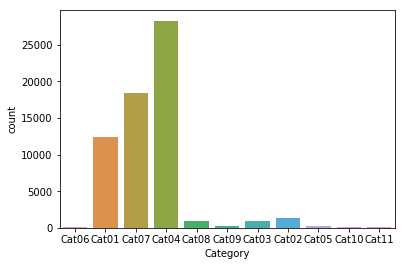

In [29]:
sns.countplot(df['Category'])

### <font color='orange'>Feature- MRP</font>

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


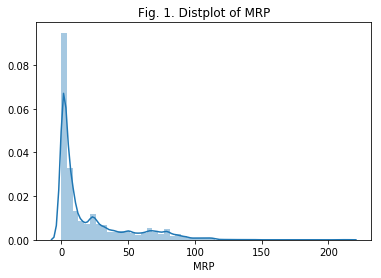

In [30]:
plt.title('Fig. 1. Distplot of MRP')
sns.distplot(df['MRP'])

<center><font color='blue'> Fig. 1. </font>From the distribution plot, it looks like there are negative entries in the feature column. We explore it more.</center>

In [31]:
df.loc[df['MRP']<0]

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty


<font color='blue'>Comment: </font>No negative values found

In [32]:
df.loc[df['MRP']==0].shape

(855, 10)

<font color='blue'>Comment</font>: The best way to deal with zero entries in MRP is to consult the seller/brand/store and replace the values with correct entries (assuming MRP cannot be zero).
<br>
<font color='blue'>Next</font>: Explore the Sales price feature, esp w.r.t. the rows where MRP is 0</font>

### <font color='orange'>Feature- Sales price</font>

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


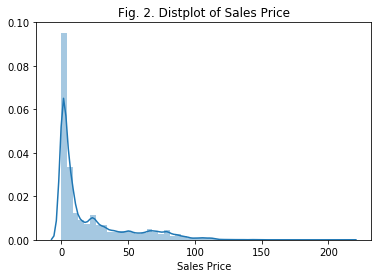

In [33]:
plt.title('Fig. 2. Distplot of Sales Price')
sns.distplot(df['Sales Price'])

In [34]:
df.loc[df['Sales Price']==0].shape

(5495, 10)

<font color='blue'>Comment</font>: The distplot looks similar to the distplot of MRP. Sales_Price=0 need to be checked with Sale/Return status.
<font color='blue'>Next</font>: Check the values of Sales Price where MRP=0

### Exploring rows with anomalous feature values

In [35]:
df.loc[(df['MRP']==0)&(df['Sales Price']==0)].shape

(754, 10)

<font color='blue'>Comment</font>: There are 754 entries with MRP=0 as well as Sales_Price=0. However, there are 855 records with MRP=0.
<font color='blue'>Next</font>: Check where MRP=0 and Sales_Price=0 as well as check where MRP=0 and Sales_Price != 0

In [36]:
# printing head for aesthetic reasons - too many rows were making the notebook too long.
# In reality, all the rows should be gone through to explore df['MRP']==0)&(df['Sales Price']!=0
df.loc[(df['MRP']==0)&(df['Sales Price']!=0)].head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
7246,SKU0650,BRAND027,Cat04,BILL18260,Store 1,2017-12-01,Sale,0.0,1.33,1
7247,SKU0631,BRAND027,Cat04,BILL18260,Store 1,2017-12-01,Sale,0.0,1.33,2


<font color='blue'>Comment</font>: All the sales made with MRP=0 and Sales_Price=0 look to be legit sales based on other field values. MRP=0 seems to be an error during data entry. Possible workarounds could be imputing the values based on existing values in the MRP field, but it may not make much sense because the Sales_Price goes from Re. 1 to few 100 rupees.
<font color='blue'>Next</font>: Check values of other features.

In [37]:
df.dtypes

SKU Code        object
Brand Code      object
Category        object
Bill Number     object
Store Code      object
Sale Date       object
Sale/Return     object
MRP            float64
Sales Price    float64
Sales Qty        int64
dtype: object

In [38]:
df['Sales Qty'].value_counts()

 1    61119
 2     1282
 3      280
-1      183
 4      102
 0       57
 5       38
 7       24
 6       21
-2        5
-4        1
 8        1
Name: Sales Qty, dtype: int64

<font color='blue'>Comment</font>: Negative values for Sales Qty, and Sales Qty=0. Negative values are errors for sure. Sales Qty=0 would be wrong if there is a non-zero Sales_Price corresponding to it.
<br>
<font color='blue'>Next</font>: Explore rows corresponding to negative and zero values in Sales Qty column. </font>

In [39]:
print(df.loc[df['Sales Qty']<0].shape, df.loc[df['Sales Qty']==0].shape)

(189, 10) (57, 10)


In [40]:
# printing head for aesthetic reasons - too many rows were making the notebook too long.
# In reality, all the rows should be gone through to explore Sales_Qty<0
df.loc[df['Sales Qty']<0].head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
0,SKU1181,BRAND041,Cat06,BILL06415,Store 1,2017-05-18,Return,0.01,0.01,-1
2,SKU1465,BRAND018,Cat07,BILL06417,Store 1,2017-07-01,Return,20.00,20.00,-1


In [41]:
# printing head for aesthetic reasons - too many rows were making the notebook too long.
# In reality, all the rows should be gone through to explore Sales_Qty=0
df.loc[df['Sales Qty']==0].head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
5101,SKU2134,BRAND050,Cat04,BILL14422,Store 1,2017-10-26,Sale,1.33,1.33,0
8556,SKU0642,BRAND027,Cat04,BILL25109,Store 4,2018-02-04,Sale,1.33,1.33,0


<font color='blue'>Comment</font>: All the sales look legit even though the corresponding Sales Qty values are negative and zero.
<br>
<font color='blue'>Next</font>: All the features are explored for possible plausible avenues. </font>

In [42]:
df.dtypes

SKU Code        object
Brand Code      object
Category        object
Bill Number     object
Store Code      object
Sale Date       object
Sale/Return     object
MRP            float64
Sales Price    float64
Sales Qty        int64
dtype: object

In [43]:
df.head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
0,SKU1181,BRAND041,Cat06,BILL06415,Store 1,2017-05-18,Return,0.01,0.01,-1
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.00,72.67,2


In [44]:
df.loc[df['MRP']<df['Sales Price']].shape

(1699, 10)

In [45]:
df.loc[df['MRP']<df['Sales Price']].head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.00,72.67,2
1327,SKU0414,BRAND017,Cat01,BILL07140,Store 1,2017-08-13,Sale,89.33,93.33,1
1474,SKU0336,BRAND017,Cat01,BILL07250,Store 1,2017-08-23,Sale,89.33,93.33,1
1544,SKU0336,BRAND017,Cat01,BILL07275,Store 1,2017-08-24,Sale,89.33,93.33,1
3024,SKU2149,BRAND027,Cat04,BILL07804,Store 1,2017-09-24,Sale,1.33,4.00,1


In [46]:
df.loc[(df['MRP']<df['Sales Price'])&(df['Sales Qty']>1)].head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.0,72.67,2
6231,SKU1131,BRAND018,Cat07,BILL16296,Store 1,2017-11-19,Sale,17.2,19.33,2
7247,SKU0631,BRAND027,Cat04,BILL18260,Store 1,2017-12-01,Sale,0.0,1.33,2
9122,SKU3676,BRAND048,Cat04,BILL22171,Store 1,2018-01-04,Sale,0.0,0.01,2
7294,SKU2355,BRAND023,Cat07,BILL22461,Store 4,2018-01-14,Sale,7.0,7.33,2


In [47]:
df.loc[(df['MRP']<df['Sales Price'])&(df['Sales Qty']>1)].head(20)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.00,72.67,2
6231,SKU1131,BRAND018,Cat07,BILL16296,Store 1,2017-11-19,Sale,17.20,19.33,2
7247,SKU0631,BRAND027,Cat04,BILL18260,Store 1,2017-12-01,Sale,0.00,1.33,2
9122,SKU3676,BRAND048,Cat04,BILL22171,Store 1,2018-01-04,Sale,0.00,0.01,2
7294,SKU2355,BRAND023,Cat07,BILL22461,Store 4,2018-01-14,Sale,7.00,7.33,2
7446,SKU2227,BRAND056,Cat07,BILL22768,Store 4,2018-01-11,Sale,13.33,14.00,2
845,SKU0626,BRAND027,Cat04,BILL09462,Store 3,2017-09-11,Sale,2.00,5.20,2
2007,SKU2229,BRAND058,Cat02,BILL12797,Store 3,2017-10-14,Sale,5.47,6.00,2


In [48]:
print(df['MRP'].min(), df['MRP'].max())

0.0 213.32


In [49]:
print(df['Sales Price'].min(), df['Sales Price'].max())

0.0 213.32


In [50]:
print(df['Sales Price'].mean(), df['MRP'].mean())

20.819701012469356 20.904964428881662


In [51]:
print(df['Sales Price'].median(), df['MRP'].median())

7.33 7.67


<font color='blue'>Comment</font>:<br>
1. Sales_Price>MRP. Error in data entry, or were customers cheated? Again, an issue with the dataset that is difficult to be imputed/corrected without information from the actual sellers. <br>
2. From the data, it is unclear if MRP and/or Sales_Price is mentioned for one item or for as many items as had been purchased in a particular sale. If MRP is for one item, and the Sales_Price is also to be assumed for one item (because the two are actually very close- also mean and median are essentially equal). If this is not the case, then possibly the data is wrong or the customers were overcharged.
<br>
<font color='blue'>Next</font>: No other combinations seem plausible to be checked against each other. </font>

In [52]:
df.loc[df['Sales Price']==0].shape

(5495, 10)

In [53]:
df.loc[df['Sales Price']==0].head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
770,SKU1803,BRAND044,Cat07,BILL06833,Store 1,2017-07-29,Sale,0.0,0.0,1
773,SKU1798,BRAND044,Cat07,BILL06834,Store 1,2017-07-29,Sale,0.0,0.0,1
776,SKU1800,BRAND044,Cat07,BILL06835,Store 1,2017-07-29,Sale,0.0,0.0,1
779,SKU1798,BRAND044,Cat07,BILL06836,Store 1,2017-07-29,Sale,0.0,0.0,1
782,SKU1798,BRAND044,Cat07,BILL06837,Store 1,2017-07-29,Sale,0.0,0.0,1


In [54]:
df.loc[(df['Sales Price']==0)&(df['MRP']==0)].shape

(754, 10)

In [55]:
df.loc[(df['Sales Price']==0)&(df['MRP']!=0)].head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty
877,SKU0663,BRAND027,Cat04,BILL06868,Store 1,2017-07-29,Sale,1.33,0.0,1
878,SKU0663,BRAND027,Cat04,BILL06868,Store 1,2017-07-29,Sale,1.33,0.0,1
879,SKU0652,BRAND027,Cat04,BILL06868,Store 1,2017-07-29,Sale,1.33,0.0,1
880,SKU0669,BRAND027,Cat04,BILL06868,Store 1,2017-07-29,Sale,1.33,0.0,1
881,SKU0669,BRAND027,Cat04,BILL06868,Store 1,2017-07-29,Sale,1.33,0.0,1


<font color='blue'>Comment</font>: Seems like some items were sold for 100% discount.
<font color='blue'>Next</font>: Check if Sale_Date column has valid dates.

In [56]:
df['Sale_Date_datetime'] =  pd.to_datetime(df['Sale Date'], format='%Y-%m-%d')

In [57]:
df.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale_Date_datetime
0,SKU1181,BRAND041,Cat06,BILL06415,Store 1,2017-05-18,Return,0.01,0.01,-1,2017-05-18
1,SKU0457,BRAND011,Cat01,BILL06416,Store 1,2017-05-22,Sale,72.00,72.67,2,2017-05-22
2,SKU1465,BRAND018,Cat07,BILL06417,Store 1,2017-07-01,Return,20.00,20.00,-1,2017-07-01
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1,2017-07-01
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1,2017-07-01


In [58]:
print(df['Sale_Date_datetime'].max(), df['Sale_Date_datetime'].min())

2018-02-28 00:00:00 2017-01-01 00:00:00


<font color='blue'>Comment</font>: There seems no issues with the dates.
<br>
<font color='blue'>Next</font>: Check for trends. </font>

# Trend Analysis
---
Rows with anomalies will be removed before trend analysis. This is being done because the anomalies are more human errors which can be corrected by consulting the data providers.
***

**Section 1.** In this section we shall see analyse for the following:
1. Brand that appeared in more transactions compared to other brands, i.e., the most frequently bought brand.<br>
2. Brand with max Sales Qty.<br>
3. Category that appeared in more transactions than other .<br>
4. Category with max Sales Qty.<br>
5. Store that was purchased from the most.<br>
6. Analyse how most frequent store relates to most frequently bought category, brand and to category, brand bought max number of times (category and brand with max sum of Sales Qty).
6. Days corresponding to the transactiond dates on which most sales were made.

### Preparing dataset for analysis

#### 1. Drop null values

In [59]:
df.shape

(63113, 11)

In [60]:
# drop rows with null entry atleast in one column
df = df.dropna()

In [61]:
df.shape

(63100, 11)

#### 2. Filter invalid values - Sales Qty, Sales Price, MRP

In [62]:
df = df.loc[df['Sales Qty']>0]
df = df.loc[df['Sales Price']>0]
df = df.loc[df['MRP']>0]
df = df.loc[df['MRP']>=df['Sales Price']] # assuming the otherwise cases occurred in the dataset due to human err

In [63]:
df.shape

(55670, 11)

#### 3. Analysis

1. Brands that appeared in more transactions compared to other brands.

In [64]:
# df['Brand Code'].value_counts().sort_values(ascending=False)[:55]
# aesthatic reason for printing only five rows
df['Brand Code'].value_counts().sort_values(ascending=False)[:5]

BRAND027    15608
BRAND050     3859
BRAND017     3249
BRAND018     3219
BRAND033     2697
Name: Brand Code, dtype: int64

In [65]:
relative_frequency_b027 = df[df['Brand Code']=='BRAND027'].shape[0]/df.shape[0]
print('% frequency of BRAND027 = ', relative_frequency_b027)

% frequency of BRAND027 =  0.28036644512304654


<font color='blue'>Comment</font>: BRAND027 appears in 28% of the sales/transactions. It means either<br>
(i)  BRAND027 was bought frequently with other items, <br>
(ii) BRAND027 was actually the item that was bought as an exclusive product (t-shirt, jeans pants, etc.) and was preferred over other brands.<br>
This would depend on the kind of stores the data was collected for and the kind of items that BRAND027 sells.
<br>
<font color='blue'>Next</font>: Check which brand was bought the most. </font>

2. Brand bought the most number of times (Brand with max Sales Qty).

In [66]:
df.groupby(['Brand Code'])['Sales Qty'].sum().sort_values(ascending=False)[:20]

Brand Code
BRAND027    16670
BRAND050     4243
BRAND017     3255
BRAND018     3244
BRAND033     2705
BRAND023     1794
BRAND034     1705
BRAND001     1360
BRAND011     1281
BRAND053     1243
BRAND003     1205
BRAND007     1061
BRAND085     1037
BRAND156      950
BRAND056      916
BRAND005      870
BRAND082      794
BRAND065      624
BRAND006      558
BRAND002      498
Name: Sales Qty, dtype: int64

In [67]:
total_qty_sold = df.groupby(['Brand Code'])['Sales Qty'].sum().sum()

In [68]:
total_qty_sold

57246

In [69]:
relative_sales_b027 = df.groupby(['Brand Code'])['Sales Qty'].sum().sort_values(ascending=False)[0]/total_qty_sold
print('% sales of BRAND027 = ', relative_sales_b027)

% sales of BRAND027 =  0.2911993851098767


<font color='blue'>Comment</font>: BRAND027 was bought 29.12% of the times out of all other items. It means BRAND027 was actually the item that was bought more often than other brands.<br>
<font color='blue'>Next</font>: Most frequently occurring category. </font>

3. Category bought most frequently.

In [70]:
df['Category'].value_counts().sort_values(ascending=False)

Cat04    22963
Cat07    17214
Cat01    11803
Cat02     1349
Cat03      901
Cat08      888
Cat05      251
Cat10      106
Cat06       80
Cat11       61
Cat09       54
Name: Category, dtype: int64

In [71]:
relative_frequency_cat04 = df['Category'].value_counts().sort_values(ascending=False)[0]/df.shape[0]
relative_frequency_cat07 = df['Category'].value_counts().sort_values(ascending=False)[1]/df.shape[0]
relative_frequency_cat01 = df['Category'].value_counts().sort_values(ascending=False)[2]/df.shape[0]
print('% relative frequency of Cat04 = ', relative_frequency_cat04)
print('% relative frequency of Cat07 = ', relative_frequency_cat07)
print('% relative frequency of Cat01 = ', relative_frequency_cat01)

% relative frequency of Cat04 =  0.4124842823783007
% relative frequency of Cat07 =  0.30921501706484644
% relative frequency of Cat01 =  0.21201724447637865


<font color='blue'>Comment</font>: Cat04 was most frequently bought category. Cat07 is very close to Cat04.<br>
<font color='blue'>Next</font>: Category with max Sales Qty. </font>

4. Category with max Sales Qty.

In [72]:
df.groupby(['Category'])['Sales Qty'].sum().sort_values(ascending=False)

Category
Cat04    24442
Cat07    17255
Cat01    11846
Cat02     1357
Cat03      902
Cat08      889
Cat05      252
Cat10      108
Cat06       80
Cat11       61
Cat09       54
Name: Sales Qty, dtype: int64

In [73]:
total_qty_sold = df.groupby(['Category'])['Sales Qty'].sum().sum()

In [74]:
total_qty_sold

57246

In [75]:
relative_sales_cat04 = df.groupby(['Category'])['Sales Qty'].sum().sort_values(ascending=False)[0]/total_qty_sold
relative_sales_cat07 = df.groupby(['Category'])['Sales Qty'].sum().sort_values(ascending=False)[1]/total_qty_sold
relative_sales_cat01 = df.groupby(['Category'])['Sales Qty'].sum().sort_values(ascending=False)[2]/total_qty_sold
print('% relative sales of Cat04 = ', relative_sales_cat04)
print('% relative sales of Cat07 = ', relative_sales_cat07)
print('% relative sales of Cat01 = ', relative_sales_cat01)

% relative sales of Cat04 =  0.42696432938545925
% relative sales of Cat07 =  0.30141843971631205
% relative sales of Cat01 =  0.20693148866296335


<font color='blue'>Comment</font>: Cat04 was the most bought category.<br>
<font color='blue'>Next</font>: Stores most frequently bought from. </font>

5. Stores most frequently bought from.

In [76]:
df['Store Code'].value_counts().sort_values(ascending=False)

Store 5    14527
Store 1     9980
Store 4     9014
Store 2     8964
Store 3     8443
Store 6     4742
Name: Store Code, dtype: int64

In [77]:
relative_frequency_store5 = df['Category'].value_counts().sort_values(ascending=False)[0]/df.shape[0]
print('% relative frequency of store5 = ', relative_frequency_store5)

% relative frequency of store5 =  0.4124842823783007


6. Analyse most frequent shops w.r.t. most frequent/sold categories and brands to find if there is a relationship.
---
Assuming both most frequently bought and most number sold brands and categories are the same (based on previous discoveries.)

In [78]:
df_store5 = df[df['Store Code']=='Store 5']

6.1. Most frequently bought brand in store 5

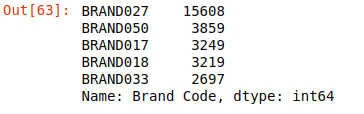

<center>Fig. Most frequently bought brand overall</center>

In [79]:
df_store5['Brand Code'].value_counts().sort_values(ascending=False)[:5]

BRAND027    4553
BRAND033    2179
BRAND017    1468
BRAND018    1396
BRAND034     935
Name: Brand Code, dtype: int64

<font color='blue'>Comment</font>: <br>
1. BRAND027, the most frequently bought overall is also the most frequently bought in this store. <br>
2. Brand033, the second most frequently bought item in Store_5, was sold 2179 times from the store. Since 2697 is the number of times it was sold overall, apparently Store_5 held most of the stocks of BRAND033.<br>
<font color='blue'>Next</font>: Categories more frequently bought from store 5. </font>

6.2. Most frequently bought category in store 5

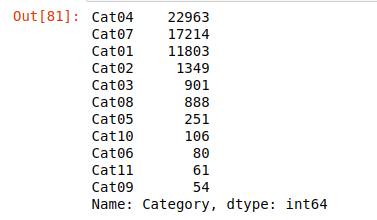

<center>Fig. Most frequently bought categories overall</center>

In [80]:
df_store5['Category'].value_counts().sort_values(ascending=False)[:5]

Cat04    5846
Cat07    5704
Cat01    2060
Cat02     494
Cat03     190
Name: Category, dtype: int64

<font color='blue'>Comment</font>: Top 5 categories in store 5, all are also in top 5 overall and in the same order.<br>
<font color='blue'>Next</font>: Month-wise analysis of sales. </font>

7. Month-wise analysis
---
7.1. Month in which most of the transactions took place.<br>
7.2. Month-wise analysis for each category. <br>
7.3. Month-wise analysis for each brand.<br>
7.4. Month-wise analysis for each store.<br>

In [81]:
df.head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale_Date_datetime
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1,2017-07-01
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1,2017-07-01


In [82]:
df['Month'] = [dt.month for dt in df['Sale_Date_datetime']]

In [83]:
df.head(2)

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Sale_Date_datetime,Month
3,SKU0774,BRAND017,Cat07,BILL06418,Store 1,2017-07-01,Sale,30.67,30.67,1,2017-07-01,7
4,SKU1695,BRAND017,Cat07,BILL06419,Store 1,2017-07-01,Sale,44.00,44.00,1,2017-07-01,7


7.1. Month in which most transactions took place

In [84]:
df['Month'].value_counts().sort_values(ascending=False)

12    7565
2     7532
1     7499
10    6492
11    6163
9     6071
8     3514
7     3505
6     2182
5     1825
3     1693
4     1629
Name: Month, dtype: int64

<font color='blue'>Comment</font>: Dec, Feb, Jan, Oct, Nov, Sep (in the same order) are the months where a lot of purchases were made.<br>
<font color='blue'>Next</font>: Month-wise analysis for each category. </font>

7.2. Month-wise analysis for each category
***
For months Dec, Feb and Jan

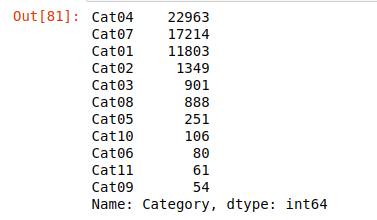

<center>Fig. Most frequently bought categories overall</center>

In [85]:
df_dec = df.loc[df['Month']==12]
df_feb = df.loc[df['Month']==2]
df_jan = df.loc[df['Month']==1]

In [86]:
df_dec['Category'].value_counts()

Cat04    3859
Cat07    2728
Cat01     458
Cat02     209
Cat08     121
Cat03     108
Cat05      37
Cat09      18
Cat11      14
Cat06      13
Name: Category, dtype: int64

In [87]:
df_feb['Category'].value_counts()

Cat07    2989
Cat04    2561
Cat01    1381
Cat02     227
Cat08     159
Cat03     126
Cat05      44
Cat06      19
Cat09      15
Cat11      11
Name: Category, dtype: int64

In [88]:
df_jan['Category'].value_counts()

Cat04    2938
Cat07    2727
Cat01    1284
Cat08     180
Cat02     174
Cat03     103
Cat05      48
Cat11      23
Cat09      13
Cat06       9
Name: Category, dtype: int64

In [89]:
df_jun = df.loc[df['Month']==6]
df_jun['Category'].value_counts()

Cat01    1259
Cat07     717
Cat04     156
Cat03      28
Cat02       9
Cat06       8
Cat05       3
Cat08       2
Name: Category, dtype: int64

In [90]:
# df[df['Category']=='Cat01'].groupby(['Month']).sum()['Sales Qty']

In [91]:
category_wise_sales_monthwise = {}

for category in df['Category'].unique():
    sales_monthwise = list(df[df['Category']==category].groupby(['Month']).sum()['Sales Qty'])
    category_wise_sales_monthwise[category] = sales_monthwise

In [92]:
# category_wise_sales_monthwise

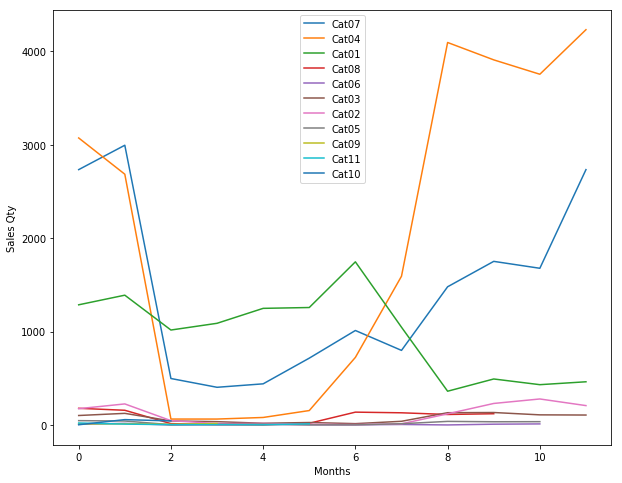

In [93]:
fig=plt.figure(figsize=(10, 8))
for category in category_wise_sales_monthwise:
    plt.plot(category_wise_sales_monthwise[category], label=category)
    plt.legend()
    plt.xlabel('Months')
    plt.ylabel('Sales Qty')
    plt.plot()

<center>Fig.- Month-wise sales for each category -- On the x-axis: 0-Jan, 1-Feb, ..., 11-Dec</center>

<font color='blue'>Comment</font>: Plot shows that different categories have different sale frequencies. <br>
<font color='blue'>Next</font>: Month-wise analysis for each brand. </font>

7.3. Month-wise analysis for each brand

In [94]:
brand_wise_sales_monthwise = {}

for brand in df['Brand Code'].unique():
    sales_monthwise = list(df[df['Brand Code']==brand].groupby(['Month']).sum()['Sales Qty'])
    brand_wise_sales_monthwise[brand] = sales_monthwise

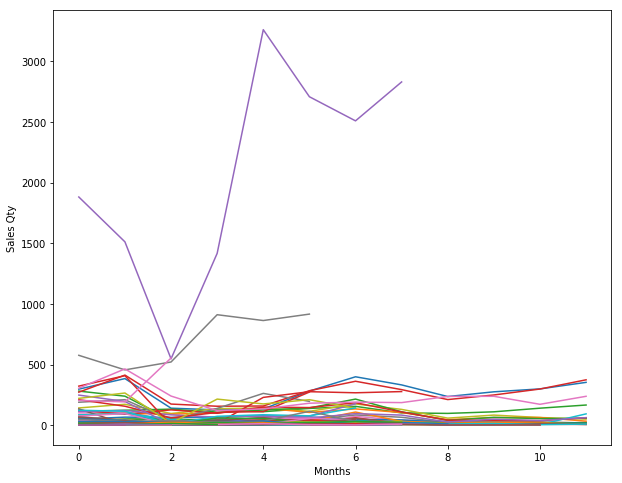

In [95]:
fig=plt.figure(figsize=(10, 8))
for brand in brand_wise_sales_monthwise:
    plt.plot(brand_wise_sales_monthwise[brand], label=brand)
#     plt.legend()
    plt.xlabel('Months')
    plt.ylabel('Sales Qty')
    plt.plot()

<center>Fig.- Brand sales month-wise.</center>

In [96]:
max_brand = []
for i in range(12):
    max_ = -1
    for brand in brand_wise_sales_monthwise:
#         print(brand_wise_sales_monthwise[brand])
        if len(brand_wise_sales_monthwise[brand]) <= i:
            continue
        curr = brand_wise_sales_monthwise[brand][i]
        if curr>max_:
            max_ = curr
            curr_max_brand = brand
            
    max_brand.append(curr_max_brand)

In [97]:
max_brand

['BRAND027',
 'BRAND027',
 'BRAND156',
 'BRAND027',
 'BRAND027',
 'BRAND027',
 'BRAND027',
 'BRAND027',
 'BRAND033',
 'BRAND017',
 'BRAND017',
 'BRAND018']

<font color='blue'>Comment</font>: BRAND027 was preferred more than other brands across the year. <br>
<font color='blue'>Next</font>: Month-wise analysis for each store. </font>

7.3. Month-wise analysis for each store

In [98]:
store_wise_sales_monthwise = {}

for store in df['Store Code'].unique():
    sales_monthwise = list(df[df['Store Code']==store].groupby(['Month']).sum()['Sales Qty'])
    store_wise_sales_monthwise[store] = sales_monthwise

In [99]:
# store_wise_sales_monthwise

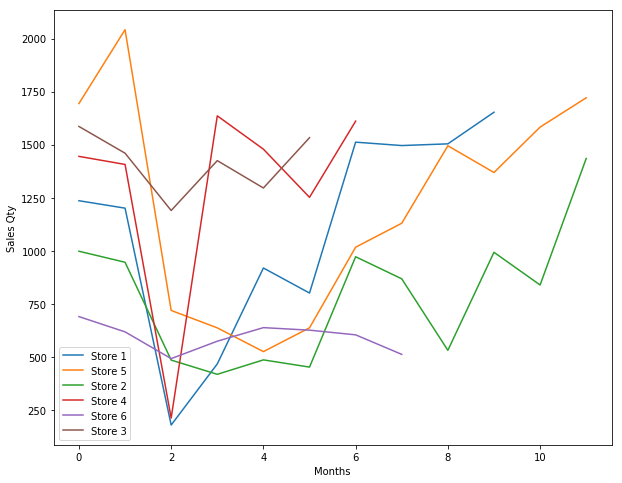

In [100]:
fig=plt.figure(figsize=(10, 8))
for store in store_wise_sales_monthwise:
    plt.plot(store_wise_sales_monthwise[store], label=store)
    plt.legend()
    plt.xlabel('Months')
    plt.ylabel('Sales Qty')
    plt.plot()

<center>Fig.- Month-wise sales by each store.</center>

In [101]:
max_store = []
for i in range(12):
    max_ = -1
    for store in store_wise_sales_monthwise:
#         print(brand_wise_sales_monthwise[brand])
        if len(store_wise_sales_monthwise[store]) <= i:
            continue
        curr = store_wise_sales_monthwise[store][i]
        if curr>max_:
            max_ = curr
            curr_max_store = store
            
    max_store.append(curr_max_store)

In [102]:
max_store

['Store 5',
 'Store 5',
 'Store 3',
 'Store 4',
 'Store 4',
 'Store 3',
 'Store 4',
 'Store 1',
 'Store 1',
 'Store 1',
 'Store 5',
 'Store 5']

<font color='blue'>Comment</font>: Store 6 is the least preferred store. <br>
<font color='blue'>Next</font>: Find reasons for this observation. </font>

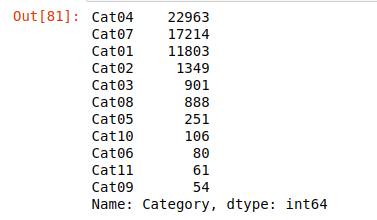

<center>Fig.- Most frequently bought categories overall</center>

In [103]:
df[df['Store Code']=='Store 6']['Category'].value_counts()

Cat01    4608
Cat02      38
Cat08      32
Cat04      28
Cat03      28
Cat05       8
Name: Category, dtype: int64

<font color='blue'>Comment</font>: Very low purchases made for popular categories. <br>
<font color='blue'>Next</font>: Check number of sales made from store 6 wrt different brands.

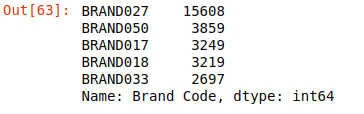

<center>Fig.- Most frequently bought brands overall</center>

In [104]:
# df[df['Store Code']=='Store 6']['Brand Code'].value_counts()

<font color='blue'>Comment</font>: Very low purchases made for popular brands. <br>
<font color='blue'>Next</font>: Discount percent analysis by store.

8. Discount Percent Analysis

8.1. Discount Percent Analysis by store

In [105]:
store_wise_total_discount_percentage_categ_wise = {}
for store in df['Store Code'].unique():
    df_temp = df.loc[df['Store Code']==store]
    df_temp_groupby_sp = df_temp.groupby('Category').sum()['Sales Price']
    total_selling_prices_categ_wise = list(zip(df_temp_groupby_sp.index, df_temp_groupby_sp))
    df_temp_groupby_mrp = df_temp.groupby('Category').sum()['MRP']
    total_MRP_categ_wise = list(zip(df_temp_groupby_mrp.index, df_temp_groupby_mrp))
    total_discounts_categ_wise = [(total_MRP_categ_wise[i][1] - total_selling_prices_categ_wise[i][1])\
                                  for i in range(len(total_selling_prices_categ_wise))]
    total_discount_percentage_categ_wise = [(total_MRP_categ_wise[i][0], round((total_discounts_categ_wise[i]*100/total_MRP_categ_wise[i][1]), 2))\
                                           for i in range(len(total_selling_prices_categ_wise))]
    
    store_wise_total_discount_percentage_categ_wise[store] = total_discount_percentage_categ_wise

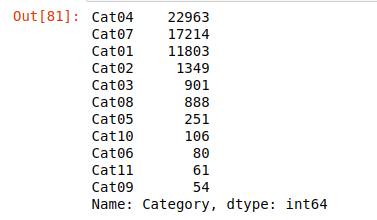

<center>Fig.- Category-wise sales overall</center>

In [106]:
# for store in store_wise_total_discount_percentage_categ_wise:
#     print(store, ':', sorted(store_wise_total_discount_percentage_categ_wise[store], key=lambda x: x[1], reverse=True))
#     print()

In [107]:
category_wise_discounts_taken_from_storewise_data = {}
for store in store_wise_total_discount_percentage_categ_wise:
    for discount in store_wise_total_discount_percentage_categ_wise[store]:
        if category_wise_discounts_taken_from_storewise_data.get(discount[0]) == None:
            category_wise_discounts_taken_from_storewise_data[discount[0]] = [discount[1]]
        else:
            category_wise_discounts_taken_from_storewise_data[discount[0]].append(discount[1])

In [108]:
for category in category_wise_discounts_taken_from_storewise_data:
    print('Average discount for', category, ':', round(sum(\
    category_wise_discounts_taken_from_storewise_data[category])/len(category_wise_discounts_taken_from_storewise_data[category]), 2))

Average discount for Cat01 : 0.44
Average discount for Cat03 : 1.56
Average discount for Cat04 : 1.64
Average discount for Cat06 : 0.96
Average discount for Cat07 : 1.38
Average discount for Cat08 : 2.24
Average discount for Cat02 : 0.23
Average discount for Cat05 : 3.03
Average discount for Cat09 : 0.0
Average discount for Cat10 : 0.0
Average discount for Cat11 : 4.33


<font color='blue'>Comment</font>: Stores provided relatively more discounts to categories with low overall sales.<br>
<font color='blue'>Next</font>: Discount percent analysis by month.

In [109]:
# df['Month'].value_counts()

8.2. Discount percent analysis by month

In [110]:
month_wise_total_discount_percentage_categ_wise = {}
for month in df['Month'].unique():
    df_temp = df.loc[df['Month']==month]
    df_temp_groupby_sp = df_temp.groupby('Category').sum()['Sales Price']
    total_selling_prices_categ_wise = list(zip(df_temp_groupby_sp.index, df_temp_groupby_sp))
    df_temp_groupby_mrp = df_temp.groupby('Category').sum()['MRP']
    total_MRP_categ_wise = list(zip(df_temp_groupby_mrp.index, df_temp_groupby_mrp))
    total_discounts_categ_wise = [(total_MRP_categ_wise[i][1] - total_selling_prices_categ_wise[i][1])\
                                  for i in range(len(total_selling_prices_categ_wise))]
    total_discount_percentage_categ_wise = [(total_MRP_categ_wise[i][0], round((total_discounts_categ_wise[i]*100/total_MRP_categ_wise[i][1]), 2))\
                                           for i in range(len(total_selling_prices_categ_wise))]
    
    month_wise_total_discount_percentage_categ_wise[month] = total_discount_percentage_categ_wise

In [116]:
for month in month_wise_total_discount_percentage_categ_wise:
    print(month, ':', sorted(month_wise_total_discount_percentage_categ_wise[month],\
                             key=lambda x: x[1], reverse=True))
    print()

7 : [('Cat04', 0.04), ('Cat01', 0.02), ('Cat02', 0.0), ('Cat03', 0.0), ('Cat06', 0.0), ('Cat07', 0.0)]

5 : [('Cat01', 0.04), ('Cat02', 0.0), ('Cat03', 0.0), ('Cat04', 0.0), ('Cat05', 0.0), ('Cat06', 0.0), ('Cat07', 0.0)]

8 : [('Cat07', 0.04), ('Cat01', 0.02), ('Cat02', 0.0), ('Cat03', 0.0), ('Cat04', 0.0), ('Cat05', 0.0), ('Cat06', 0.0), ('Cat08', 0.0)]

6 : [('Cat01', 0.01), ('Cat02', 0.0), ('Cat03', 0.0), ('Cat04', 0.0), ('Cat05', 0.0), ('Cat06', 0.0), ('Cat07', 0.0), ('Cat08', 0.0)]

9 : [('Cat02', 0.55), ('Cat04', 0.19), ('Cat07', 0.02), ('Cat01', 0.01), ('Cat03', 0.0), ('Cat05', 0.0), ('Cat06', 0.0), ('Cat08', 0.0), ('Cat10', 0.0), ('Cat11', 0.0)]

10 : [('Cat08', 7.02), ('Cat05', 5.35), ('Cat04', 1.62), ('Cat07', 1.4), ('Cat03', 1.15), ('Cat01', 0.83), ('Cat02', 0.0), ('Cat06', 0.0), ('Cat10', 0.0), ('Cat11', 0.0)]

11 : [('Cat08', 6.62), ('Cat03', 3.96), ('Cat05', 3.1), ('Cat04', 2.26), ('Cat07', 1.36), ('Cat01', 0.25), ('Cat06', 0.16), ('Cat02', 0.02), ('Cat09', 0.0), ('Cat10

<font color='blue'>Comment</font>:Oct, Nov, Des, Jan, Feb were the months when discount rates were high. Discounts rates during these months were higher for brands which are sold relative less overall.<br>
<font color='blue'>Next</font>: Number of unique SKUs sold by each store and month.

9. Number of unique SKUs sold by each store and month

9.1. Number of unique SKUs sold by each store - deep dive by categories

In [125]:
for store in df['Store Code'].unique():
    df_temp = df.loc[df['Store Code']==store]
    print('-------', store, '-------------------')
    print(df_temp.groupby('Category')['SKU Code'].value_counts())
    print()

------- Store 1 -------------------
Category  SKU Code
Cat01     SKU0051     16
          SKU0085     11
          SKU0061     10
          SKU0159     10
          SKU0101      9
          SKU0382      9
          SKU0257      8
          SKU0576      8
          SKU1649      8
          SKU1928      8
          SKU0011      7
          SKU0066      7
          SKU0703      7
          SKU1987      7
          SKU0027      6
          SKU0100      6
          SKU0141      6
          SKU0421      6
          SKU0695      6
          SKU1888      6
          SKU1907      6
          SKU1913      6
          SKU0013      5
          SKU0047      5
          SKU0068      5
          SKU0102      5
          SKU0160      5
          SKU0213      5
          SKU0231      5
          SKU0250      5
                      ..
Cat07     SKU3849      1
          SKU3891      1
          SKU3898      1
          SKU3911      1
          SKU3954      1
          SKU3967      1
          SKU3980   

9.2. Number of unique SKUs sold by each month - deep dive by categories

In [127]:
for month in df['Month'].unique():
    df_temp = df.loc[df['Store Code']==store]
    print('----------------','Month', month, '-------------------')
    print(df_temp.groupby('Month')['SKU Code'].value_counts())
    print()

---------------- Month 7 -------------------
Month  SKU Code
1      SKU2313     25
       SKU2123     22
       SKU0640     13
       SKU0707     13
       SKU0761     13
       SKU0639     11
       SKU1390     10
       SKU2227     10
       SKU2310     10
       SKU2383     10
       SKU0630      9
       SKU0637      9
       SKU2355      9
       SKU2551      9
       SKU2635      9
       SKU0652      8
       SKU0693      8
       SKU0762      8
       SKU1668      8
       SKU2117      8
       SKU2235      8
       SKU2264      8
       SKU2460      8
       SKU2636      8
       SKU3626      8
       SKU3673      8
       SKU0654      7
       SKU2122      7
       SKU2247      7
       SKU2278      7
                   ..
12     SKU3643      1
       SKU3645      1
       SKU3651      1
       SKU3654      1
       SKU3655      1
       SKU3656      1
       SKU3660      1
       SKU3670      1
       SKU3672      1
       SKU3681      1
       SKU3685      1
       SKU3686 